## Abstract

This study investigates the variation in the number of fouls committed by a specific player across different derby matches played since their last season. Using game events and player data sourced from CSV files, the analysis identifies fouls based on event descriptions and integrates this information with player profiles. The dataset is meticulously cleaned to ensure accuracy before determining the player with the highest foul count, facilitating clearer visualization due to the extensive dataset size. By comparing fouls in the most recent derby with previous ones, the study utilizes bar graphs and line plots to visually depict trends and patterns.

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import string
plt.style.use('ggplot')

# IMPORT CSV DATASET

In [45]:
df_games_events = pd.read_csv('AssignmentData/game_events.csv')
df_players = pd.read_csv('AssignmentData/players.csv')

In [46]:
df_games_events

,game_event_id,date,game_id,minute,type,club_id,player_id,description,player_in_id,player_assist_id
0,2f41da30c471492e7d4a984951671677,2012-08-05,2211607,77,Cards,610,4425,"1. Yellow card , Mass confrontation",NaN,NaN
1,a72f7186d132775f234d3e2f7bc0ed5b,2012-08-05,2211607,77,Cards,383,33210,"1. Yellow card , Mass confrontation",NaN,NaN
2,b2d721eaed4692a5c59a92323689ef18,2012-08-05,2211607,3,Goals,383,36500,", Header, 1. Tournament Goal Assist: , Corner, 1. Tournament Assist",NaN,56416.0
3,aef768899cedac0c9a650980219075a2,2012-08-05,2211607,53,Goals,383,36500,", Right-footed shot, 2. Tournament Goal Assist: , Pass, 1. Tournament Assist",NaN,146258.0
4,5d6d9533023057b6619ecd145a038bbe,2012-08-05,2211607,74,Substitutions,383,36500,", Not reported",49499.0,NaN
...,...,...,...,...,...,...,...,...,...,...
666553,7f5a6b61ca858e0cd63a58c554b56bb7,2023-11-15,4228114,82,Substitutions,358,874064,", Tactical",965607.0,NaN
666554,5b93d1bc9e8bf42965682d491e1dd6c7,2023-11-15,4228114,44,Goals,46889,922572,", Penalty, 1. Tournament Goal",NaN,NaN
666555,d638b1e72f531c413487d413258a3130,2023-11-15,4228114,68,Substitutions,46889,922572,", Tactical",1200869.0,NaN
666556,0ff7774aa1383af83e40c435325463af,2023-11-15,4228114,68,Substitutions,46889,1200864,", Tactical",921121.0,NaN


In [47]:
df_players

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name
0,598,Timo,Hildebrand,Timo Hildebrand,2014,24,timo-hildebrand,Germany,Worms,Germany,1979-04-05,Goalkeeper,Goalkeeper,NaN,NaN,NaN,10000000.0,NaN,NaN,https://img.a.transfermarkt.technology/portrait/header/598-1540373444.jpg?lm=1,https://www.transfermarkt.co.uk/timo-hildebrand/profil/spieler/598,L1,Eintracht Frankfurt
1,670,Martin,Petrov,Martin Petrov,2012,714,martin-petrov,Bulgaria,Vratsa,Bulgaria,1979-01-15,Left Winger,Attack,NaN,NaN,NaN,12000000.0,NaN,IFM,https://img.a.transfermarkt.technology/portrait/header/670-1656218742.png?lm=1,https://www.transfermarkt.co.uk/martin-petrov/profil/spieler/670,ES1,RCD Espanyol Barcelona
2,1323,Martin,Amedick,Martin Amedick,2012,24,martin-amedick,Germany,Paderborn,Germany,1982-09-06,Centre-Back,Defender,NaN,NaN,NaN,2750000.0,NaN,NaN,https://img.a.transfermarkt.technology/portrait/header/1323-1544181603.jpg?lm=1,https://www.transfermarkt.co.uk/martin-amedick/profil/spieler/1323,L1,Eintracht Frankfurt
3,3195,Jermaine,Pennant,Jermaine Pennant,2013,512,jermaine-pennant,England,Nottingham,England,1983-01-15,Right Winger,Attack,right,173.0,NaN,10500000.0,NaN,Andrew Sky,https://img.a.transfermarkt.technology/portrait/header/s_3195_512_2013_03_08_1.jpg?lm=1,https://www.transfermarkt.co.uk/jermaine-pennant/profil/spieler/3195,GB1,Stoke City
4,3259,Damien,Duff,Damien Duff,2013,931,damien-duff,Ireland,Ballyboden,Ireland,1979-03-02,Right Midfield,Midfield,left,177.0,NaN,17000000.0,NaN,NaN,https://img.a.transfermarkt.technology/portrait/header/3259-1410962728.jpg?lm=1,https://www.transfermarkt.co.uk/damien-duff/profil/spieler/3259,GB1,Fulham FC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30297,371851,Jaka,Bijol,Jaka Bijol,2023,410,jaka-bijol,Slovenia,Vuzenica,Slovenia,1999-02-05,Centre-Back,Defender,right,190.0,10000000.0,10000000.0,2027-06-30 00:00:00,MSC GROUP,https://img.a.transfermarkt.technology/portrait/header/371851-1695029407.jpg?lm=1,https://www.transfermarkt.co.uk/jaka-bijol/profil/spieler/371851,IT1,Udinese Calcio
30298,537171,Semuel,Pizzignacco,Semuel Pizzignacco,2018,410,semuel-pizzignacco,Italy,Monfalcone,Italy,2001-09-01,Goalkeeper,Goalkeeper,right,188.0,325000.0,350000.0,2025-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrait/header/537171-1632462862.png?lm=1,https://www.transfermarkt.co.uk/semuel-pizzignacco/profil/spieler/537171,IT1,Udinese Calcio
30299,586756,Festy,Ebosele,Festy Ebosele,2023,410,festy-ebosele,Ireland,"Enniscorthy, Wexford",Ireland,2002-08-02,Right Midfield,Midfield,right,180.0,4500000.0,4500000.0,2027-06-30 00:00:00,The Kulture Group,https://img.a.transfermarkt.technology/portrait/header/586756-1642673454.jpg?lm=1,https://www.transfermarkt.co.uk/festy-ebosele/profil/spieler/586756,IT1,Udinese Calcio
30300,704692,Nicolò,Cocetta,Nicolò Cocetta,2022,410,nicolo-cocetta,Italy,San Daniele del Friuli,Italy,2003-12-19,Centre-Back,Defender,NaN,NaN,75000.0,75000.0,2023-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrait/header/default.jpg?lm=1,https://www.transfermarkt.co.uk/nicolo-cocetta/profil/spieler/704692,IT1,Udinese Calcio


### Data Cleaning for game events

In [48]:
# Function to clean and give a better structure to the string of the description field in df_games_events
def clean_string(text):
    # Convert to string if it's not already
    if isinstance(text, str):
        # Remove leading and trailing commas
        text = text.strip(',')

        # Remove all numbers
        text = ''.join(filter(lambda x: not x.isdigit(), text))

        # Remove dots and colons
        text = text.replace('.', '').replace(':', '')

        # Remove all whitespace
        text = text.replace(' ', '')

        return text
    else:
        return str(text)  # Convert non-string to string (handles NaN)

# Apply cleaning function to description column
df_games_events['cleaned_description'] = df_games_events['description'].apply(clean_string)

# Print all content in the 'description' column without truncation
pd.set_option('display.max_colwidth', None)

# Create a 'foul' column with a default value of False.
df_games_events['isFoul'] = False

# Filter rows where 'cleaned_description' contains 'foul' and set 'isFoul' accordingly
filtered_df = df_games_events[df_games_events['cleaned_description'].str.contains('foul', na=False)]

# df_games_events.pop('description')

if not filtered_df.empty:
    df_games_events.loc[filtered_df.index, 'isFoul'] = True
    
# filtered_df['foul'] = df_games_events.get('foul', False)
df_games_events.loc[df_games_events['isFoul'] == True]

,game_event_id,date,game_id,minute,type,club_id,player_id,description,player_in_id,player_assist_id,cleaned_description,isFoul
182,66669735ca672692b2fef163bf54c0d4,2012-08-19,2221754,22,Cards,48,126414,"1. Yellow card , Serious foul",NaN,NaN,"Yellowcard,Seriousfoul",True
215,5d52467708d6c25d619b6198c1b3681f,2012-08-19,2221757,-1,Cards,10,77879,"1. Yellow card , Serious foul",NaN,NaN,"Yellowcard,Seriousfoul",True
317,53a565c73dc3371f12e8368e2b1a90e7,2012-08-19,2221765,19,Cards,24,45672,"Red card , Professional foul",NaN,NaN,"Redcard,Professionalfoul",True
345,3467cb12295a6033cce88dc321a0dce9,2012-08-18,2221768,14,Cards,8,505,"1. Yellow card , Serious foul",NaN,NaN,"Yellowcard,Seriousfoul",True
434,62e076ae0fd417f6ecca7b07a3d02f22,2012-08-19,2221774,48,Cards,72,47474,"1. Yellow card , Serious foul",NaN,NaN,"Yellowcard,Seriousfoul",True
...,...,...,...,...,...,...,...,...,...,...,...,...
665501,715e4a4f3e8441128d2f8b0b879d0464,2023-11-04,4219014,18,Cards,1211,321416,"Red card , Professional foul",NaN,NaN,"Redcard,Professionalfoul",True
666099,48c730c258700e01f4b89196b2839574,2023-11-29,4222126,40,Cards,232,461512,"Red card , Professional foul",NaN,NaN,"Redcard,Professionalfoul",True
666131,657846a0f91dc84a28b8b9fbd7c2996a,2023-11-29,4222128,70,Cards,121,354145,"Second yellow , Serious foul",NaN,NaN,"Secondyellow,Seriousfoul",True
666355,bdee4adc2ca36b8f40ff85841c6cd790,2023-11-26,4225546,90,Cards,49702,404912,"1. Yellow card , Tactical foul",NaN,NaN,"Yellowcard,Tacticalfoul",True


### Data Cleaning for players

In [49]:
df_players = df_players[['player_id', 'first_name', 'last_name', 'name', 'last_season',
       'current_club_id', 'player_code', 'country_of_birth', 'city_of_birth',
       'country_of_citizenship', 'date_of_birth', 'sub_position', 'position','height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur', 'current_club_domestic_competition_id',
       'current_club_name']]

In [50]:
df_players

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,sub_position,position,height_in_cm,market_value_in_eur,highest_market_value_in_eur,current_club_domestic_competition_id,current_club_name
0,598,Timo,Hildebrand,Timo Hildebrand,2014,24,timo-hildebrand,Germany,Worms,Germany,1979-04-05,Goalkeeper,Goalkeeper,NaN,NaN,10000000.0,L1,Eintracht Frankfurt
1,670,Martin,Petrov,Martin Petrov,2012,714,martin-petrov,Bulgaria,Vratsa,Bulgaria,1979-01-15,Left Winger,Attack,NaN,NaN,12000000.0,ES1,RCD Espanyol Barcelona
2,1323,Martin,Amedick,Martin Amedick,2012,24,martin-amedick,Germany,Paderborn,Germany,1982-09-06,Centre-Back,Defender,NaN,NaN,2750000.0,L1,Eintracht Frankfurt
3,3195,Jermaine,Pennant,Jermaine Pennant,2013,512,jermaine-pennant,England,Nottingham,England,1983-01-15,Right Winger,Attack,173.0,NaN,10500000.0,GB1,Stoke City
4,3259,Damien,Duff,Damien Duff,2013,931,damien-duff,Ireland,Ballyboden,Ireland,1979-03-02,Right Midfield,Midfield,177.0,NaN,17000000.0,GB1,Fulham FC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30297,371851,Jaka,Bijol,Jaka Bijol,2023,410,jaka-bijol,Slovenia,Vuzenica,Slovenia,1999-02-05,Centre-Back,Defender,190.0,10000000.0,10000000.0,IT1,Udinese Calcio
30298,537171,Semuel,Pizzignacco,Semuel Pizzignacco,2018,410,semuel-pizzignacco,Italy,Monfalcone,Italy,2001-09-01,Goalkeeper,Goalkeeper,188.0,325000.0,350000.0,IT1,Udinese Calcio
30299,586756,Festy,Ebosele,Festy Ebosele,2023,410,festy-ebosele,Ireland,"Enniscorthy, Wexford",Ireland,2002-08-02,Right Midfield,Midfield,180.0,4500000.0,4500000.0,IT1,Udinese Calcio
30300,704692,Nicolò,Cocetta,Nicolò Cocetta,2022,410,nicolo-cocetta,Italy,San Daniele del Friuli,Italy,2003-12-19,Centre-Back,Defender,NaN,75000.0,75000.0,IT1,Udinese Calcio


### Merge game events dataframe with players dataframe on 'player_id'

In [51]:
merged_df = pd.merge(df_games_events, df_players, on='player_id', how='inner')
pd.set_option('display.max_columns', None)

### Data Cleaning for merged_df

In [52]:
merged_df.columns

Index(['game_event_id', 'date', 'game_id', 'minute', 'type', 'club_id',
       'player_id', 'description', 'player_in_id', 'player_assist_id',
       'cleaned_description', 'isFoul', 'first_name', 'last_name', 'name',
       'last_season', 'current_club_id', 'player_code', 'country_of_birth',
       'city_of_birth', 'country_of_citizenship', 'date_of_birth',
       'sub_position', 'position', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur', 'current_club_domestic_competition_id',
       'current_club_name'],
      dtype='object')

In [53]:
merged_df = merged_df[
['game_event_id', 'date', 'game_id', 'minute', 'type', 'club_id',
       'player_id', 'player_in_id', 'player_assist_id',
       'cleaned_description', 'isFoul', 'first_name', 'last_name', 'name',
       'last_season', 'current_club_id', 'player_code', 'country_of_birth',
       'city_of_birth', 'country_of_citizenship',
       'sub_position', 'position',
       'highest_market_value_in_eur', 'current_club_domestic_competition_id',
       'current_club_name']
]

### Select the player_id with the most occurrences where the isFoul column is True

In [54]:
# Filter rows where isFoul is True
foul_events = merged_df[merged_df['isFoul']]

# Count occurrences of player_id
foul_counts = foul_events['player_id'].value_counts()

# Get player_id with the most occurrences of True in isFoul
most_fouls_player_id = foul_counts.idxmax()
# merged_df[merged_df['player_id'] == most_fouls_player_id]
most_fouls_player_id

110668

### Select a specific player and check how many fouls they have committed. 
Comparison between the most recent derby and the previous derby.

In [55]:
# Convert 'date' column to datetime format
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Select data for the player with the most fouls
df_player_selected = merged_df[merged_df['player_id'] == most_fouls_player_id]

# Get the year of the most recent derby
date = df_player_selected['date'].dt.year.max()
print("{}'s most recent derby: '{}'".format(df_player_selected['name'].iloc[0], date))

# Filter fouls for the most recent derby and previous derbies
df_games_events_not_dated = df_player_selected[df_player_selected['date'].dt.year >= date]
df_games_events_not_dated = df_games_events_not_dated[df_games_events_not_dated['isFoul'] == True]

df_games_events_dated = df_player_selected[df_player_selected['date'].dt.year < date]
df_games_events_dated = df_games_events_dated[df_games_events_dated['isFoul'] == True]

# Count fouls in recent and previous derbies
not_dated_foul_counter = df_games_events_not_dated.shape[0]
dated_foul_counter = df_games_events_dated.shape[0]

df_games_events_dated

Laurens De Bock's most recent derby: '2023'


,game_event_id,date,game_id,minute,type,club_id,player_id,player_in_id,player_assist_id,cleaned_description,isFoul,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,sub_position,position,highest_market_value_in_eur,current_club_domestic_competition_id,current_club_name
92235,ec03f380439a63601fd06b7bdacbfc55,2012-11-24,2224828,81,Cards,498,110668,NaN,NaN,"Redcard,Professionalfoul",True,Laurens,De Bock,Laurens De Bock,2023,3060,laurens-de-bock,Belgium,Dendermonde,Belgium,Left-Back,Defender,3500000.0,GR1,Atromitos Athens
92239,9b8577b76370c36475a65162e0356f79,2013-02-03,2224914,56,Cards,2282,110668,NaN,NaN,"Redcard,Professionalfoul",True,Laurens,De Bock,Laurens De Bock,2023,3060,laurens-de-bock,Belgium,Dendermonde,Belgium,Left-Back,Defender,3500000.0,GR1,Atromitos Athens
92241,94b0baec23dae7cf6ad7715114bcab2c,2013-08-17,2329695,76,Cards,2282,110668,NaN,NaN,"Redcard,Seriousfoul",True,Laurens,De Bock,Laurens De Bock,2023,3060,laurens-de-bock,Belgium,Dendermonde,Belgium,Left-Back,Defender,3500000.0,GR1,Atromitos Athens


### Create and visualize a bar graph to compare fouls in recent and previous derbies

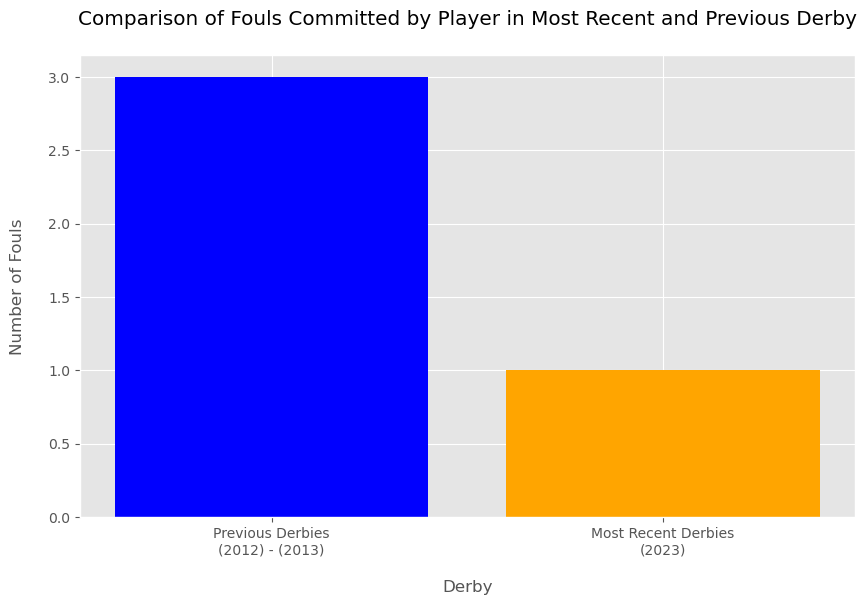

In [56]:
# Get a date range of Previous Derbies
minimum_date_value = df_games_events_dated['date'].dt.year.min()
maximum_date_value = df_games_events_dated['date'].dt.year.max()
previous_date_range =  '({}) - ({})'.format(minimum_date_value, maximum_date_value) if minimum_date_value != maximum_date_value else '({})'.format(minimum_date_value)
labels = ['Previous Derbies\n{}'.format(previous_date_range), 'Most Recent Derbies\n({})'.format(date)]
foul_counts = [dated_foul_counter, not_dated_foul_counter]

plt.figure(figsize=(10, 6))
plt.bar(labels, foul_counts, color=['blue', 'orange'])
plt.xlabel('\nDerby')
plt.ylabel('Number of Fouls\n')
plt.title('Comparison of Fouls Committed by Player in Most Recent and Previous Derby\n')
plt.show()

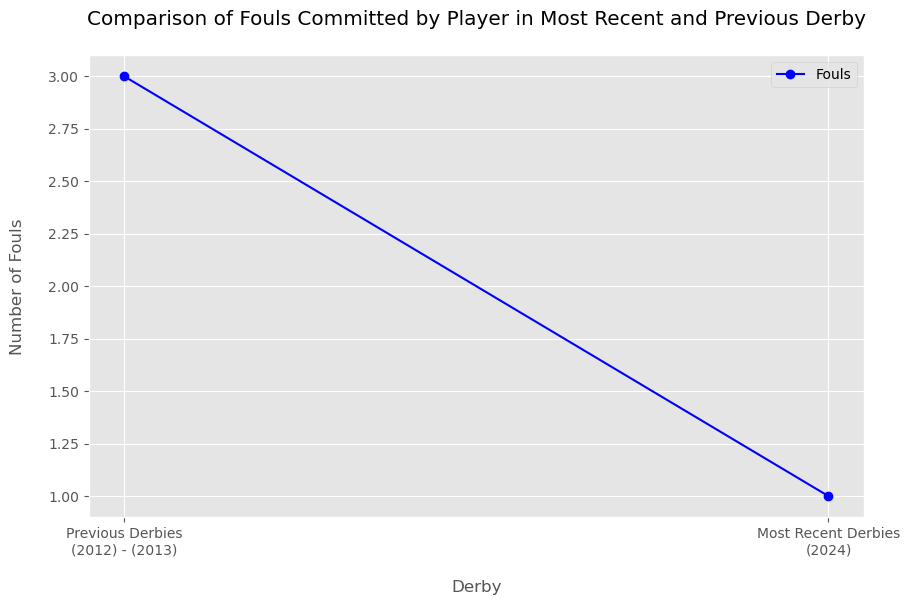

In [57]:
previous_date_range = '({}) - ({})'.format(minimum_date_value, maximum_date_value) if minimum_date_value != maximum_date_value else '({})'.format(minimum_date_value)

labels = ['Previous Derbies\n{}'.format(previous_date_range), 'Most Recent Derbies\n(2024)']
foul_counts = [dated_foul_counter, not_dated_foul_counter]

plt.figure(figsize=(10, 6))
plt.plot(labels, foul_counts, marker='o', linestyle='-', color='b', label='Fouls')

plt.xlabel('\nDerby')
plt.ylabel('Number of Fouls\n')
plt.title('Comparison of Fouls Committed by Player in Most Recent and Previous Derby\n')
plt.legend()
plt.grid(True)
plt.show()